## КОНТРОЛЬНАЯ РАБОТА № 2


### Дисциплина: Методы машинного обучения

##### Студент:  Фаик Карим
##### Группа:   НФИбд-02-21

Вариант №10


***

In [ ]:
import numpy as np
import pandas as pd
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

##  1.Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets, включая указанные в задании независимый признак и зависимый признак (отклик). Оставьте в наборе признаки, принимающие числовые значения.

In [300]:
ds = tfds.load("cherry_blossoms", split='train')
ds

<_PrefetchDataset element_spec={'doy': TensorSpec(shape=(), dtype=tf.float32, name=None), 'temp': TensorSpec(shape=(), dtype=tf.float32, name=None), 'temp_lower': TensorSpec(shape=(), dtype=tf.float32, name=None), 'temp_upper': TensorSpec(shape=(), dtype=tf.float32, name=None), 'year': TensorSpec(shape=(), dtype=tf.int32, name=None)}>

In [301]:
df = tfds.as_dataframe(ds)
df.head()

,doy,temp,temp_lower,temp_upper,year
0,NaN,6.46,4.76,8.16,1300
1,105.0,5.63,4.90,6.37,1638
2,109.0,5.81,4.68,6.95,1347
3,104.0,5.70,4.87,6.53,1187
4,107.0,6.20,5.31,7.09,1617


In [302]:
X = df["temp"]
y = df["temp_lower"]

## 2. Удалите из набора точки с выбросами при помощи стандартизованной оценки (Z-score) таким образом, чтобы точки с выбросами составляли от 5% до 10% всех точек набора данных. Визуализируйте точки исходного набора данных на плоскости в виде диаграммы рассеяния (ось X – независимый признак, ось Y – зависимый признак), показывая оставленные в наборе точки и удаленные точки разными цветами, подписывая оси и рисунок и создавая легенду.  

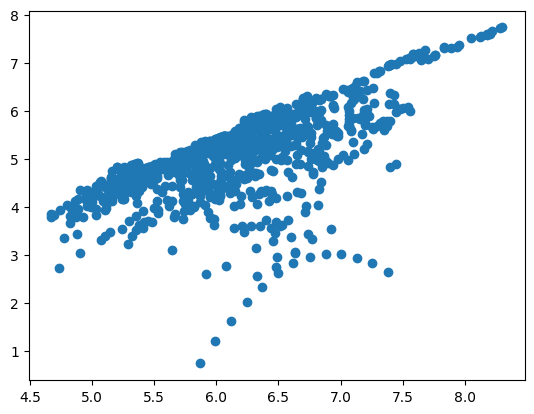

In [303]:
plt.scatter(X, y);

In [304]:
z_score = 3.
print('Число точек до удаления выбросов = %d' % (X.shape))
z_scores = (X - np.mean(X))/np.std(X)

Число точек до удаления выбросов = 1215


In [305]:
lower_threshold = z_scores.quantile(0.05)
upper_threshold = z_scores.quantile(0.95)

In [306]:
Xz =  X[(z_scores >= lower_threshold) & (z_scores <= upper_threshold)]
yz = y[(z_scores >= lower_threshold) & (z_scores <= upper_threshold)]
Xd = X[(z_scores < lower_threshold) | (z_scores > upper_threshold)]
yd = y[(z_scores < lower_threshold) | (z_scores > upper_threshold)]

In [307]:
print('Число точек после удаления выбросов = %d' % (Xz.shape))


Число точек после удаления выбросов = 1010


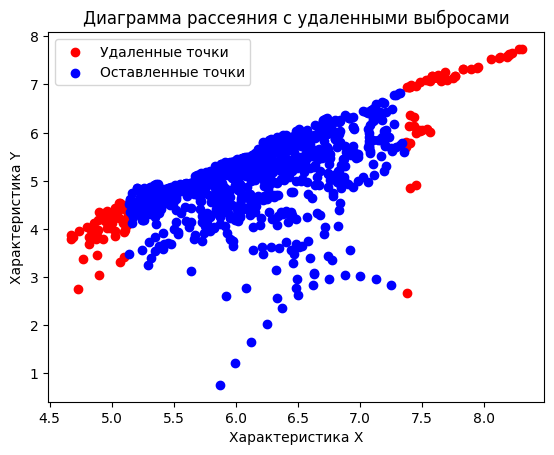

In [308]:


plt.scatter(Xd, yd, color='red', label='Удаленные точки')
plt.scatter(Xz, yz, color='blue', label='Оставленные точки')
plt.xlabel('Характеристика X')
plt.ylabel('Характеристика Y')
plt.title('Диаграмма рассеяния с удаленными выбросами')
plt.legend()
plt.show()

## 3. Выполните стандартизацию независимого признака и масштабирование на интервал [-1, 1] зависимого признака. Решите задачи линейной регрессии и полиномиальной регрессии для степени полинома, указанной в индивидуальном задании, при помощи нейронных сетей с одним нейроном и оцените качество полученных моделей по показателю, указанному в индивидуальном задании. Отследите обучение нейронных сетей, изменяя, при необходимости, гиперпараметры (функцию потерь, оптимизатор, шаг обучения и т.п.) или применяя регуляризацию.  

Стандартизация и масштабирование

In [309]:

Xs = (Xz - np.mean(Xz))/np.std(Xz)
np.std(Xs),np.mean(Xs)

(0.99999994, -5.3821225e-07)

In [310]:
ym =  -1 + 2 * (yz - np.min(yz))/(np.max(yz) - np.min(yz))
np.min(ym), np.max(ym)

(-1.0, 1.0)

Линейная регрессия

In [311]:
linear_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

In [312]:
linear_model.compile(optimizer='adam', loss='mean_squared_error')

In [313]:
linear_history = linear_model.fit(Xs, ym, epochs=20, validation_split=0.2)

Epoch 1/20
26/26 [==============================] - 1s 13ms/step - loss: 0.2645 - val_loss: 0.2604
Epoch 2/20
26/26 [==============================] - 0s 5ms/step - loss: 0.2338 - val_loss: 0.2312
Epoch 3/20
26/26 [==============================] - 0s 5ms/step - loss: 0.2065 - val_loss: 0.2055
Epoch 4/20
26/26 [==============================] - 0s 6ms/step - loss: 0.1826 - val_loss: 0.1828
Epoch 5/20
26/26 [==============================] - 0s 5ms/step - loss: 0.1615 - val_loss: 0.1624
Epoch 6/20
26/26 [==============================] - 0s 6ms/step - loss: 0.1426 - val_loss: 0.1448
Epoch 7/20
26/26 [==============================] - 0s 5ms/step - loss: 0.1269 - val_loss: 0.1293
Epoch 8/20
26/26 [==============================] - 0s 5ms/step - loss: 0.1131 - val_loss: 0.1164
Epoch 9/20
26/26 [==============================] - 0s 5ms/step - loss: 0.1012 - val_loss: 0.1055
Epoch 10/20
26/26 [==============================] - 0s 5ms/step - loss: 0.0913 - val_loss: 0.0954
Epoch 11/20
26/26 

In [314]:
predict_y = linear_model.predict(Xs)

32/32 [==============================] - 0s 2ms/step


In [315]:
predict_y = predict_y[np.argsort(Xz)]


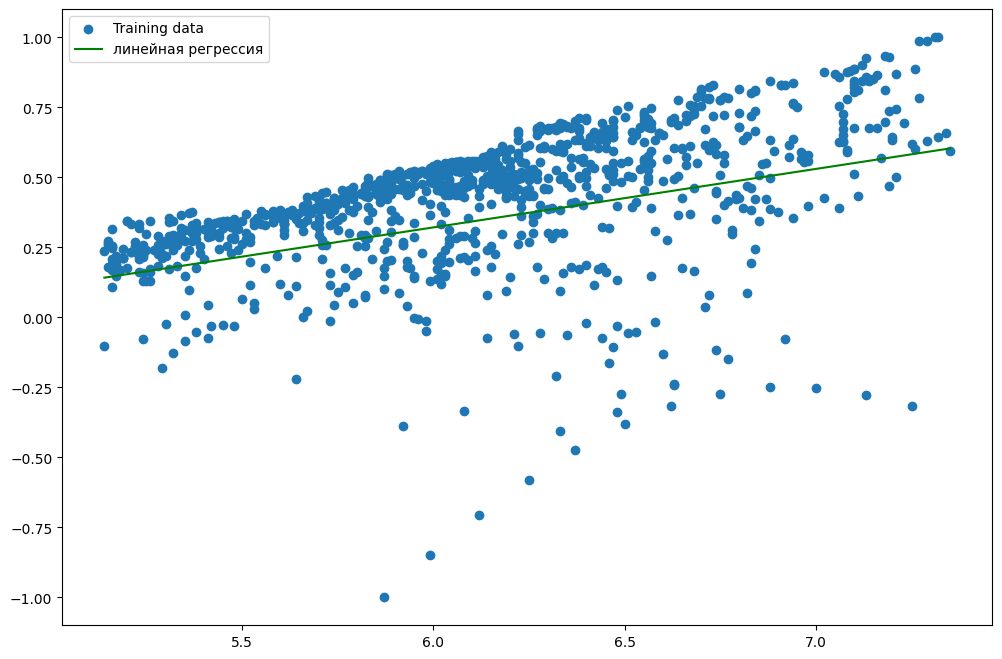

In [316]:
plt.figure(figsize=(12,8))
plt.scatter(Xz, ym,marker='o', label='Training data')
plt.plot(np.sort(Xz), predict_y, c='g', label='линейная регрессия')
plt.legend();

In [317]:
def plot_loss(history,title):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.ylim([0, max(history.history['loss'])])
  plt.title(title)
  plt.xlabel('Эпохи обучения')
  plt.ylabel('Функция потерь')
  plt.legend(['Обучающая выборка', 'Тестовая выборка'], loc='upper right')
  plt.grid(True)


In [318]:
Xs = np.array(Xs).reshape(-1,1)
X_poly = np.hstack([Xs, Xs**2, Xs**3])
X_poly.shape

(1010, 3)

In [319]:
poly_model = tf.keras.Sequential([
    tf.keras.Input(shape=(3,)),
    tf.keras.layers.Dense(units=1)
])

In [320]:
poly_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=1e-3),
    loss='MSE')


In [321]:
history= poly_model.fit(X_poly, ym, epochs= 20 ,validation_split=0.2, verbose=1)

Epoch 1/20
26/26 [==============================] - 1s 8ms/step - loss: 1.3996 - val_loss: 1.5439
Epoch 2/20
26/26 [==============================] - 0s 4ms/step - loss: 1.2628 - val_loss: 1.3812
Epoch 3/20
26/26 [==============================] - 0s 4ms/step - loss: 1.1334 - val_loss: 1.2390
Epoch 4/20
26/26 [==============================] - 0s 3ms/step - loss: 1.0161 - val_loss: 1.1166
Epoch 5/20
26/26 [==============================] - 0s 4ms/step - loss: 0.9116 - val_loss: 0.9975
Epoch 6/20
26/26 [==============================] - 0s 4ms/step - loss: 0.8178 - val_loss: 0.8952
Epoch 7/20
26/26 [==============================] - 0s 3ms/step - loss: 0.7339 - val_loss: 0.7976
Epoch 8/20
26/26 [==============================] - 0s 4ms/step - loss: 0.6579 - val_loss: 0.7133
Epoch 9/20
26/26 [==============================] - 0s 3ms/step - loss: 0.5885 - val_loss: 0.6411
Epoch 10/20
26/26 [==============================] - 0s 3ms/step - loss: 0.5270 - val_loss: 0.5715
Epoch 11/20
26/26 [

In [322]:
predict_yp = poly_model.predict(X_poly)
predict_yp = predict_yp[np.argsort(Xz)]
predict_yp = predict_yp.reshape(predict_yp.shape[0],predict_yp.shape[1])

32/32 [==============================] - 0s 1ms/step


### Выполним оценку наших моделей

In [323]:
mean_squared_error(yz,predict_y)

22.789375

In [324]:
mean_squared_error(ym,predict_yp)

0.19361709

# 4.	Постройте кривые обучения для построенных нейронных сетей с зависимостью от количества эпох. На визуализации создайте легенду.

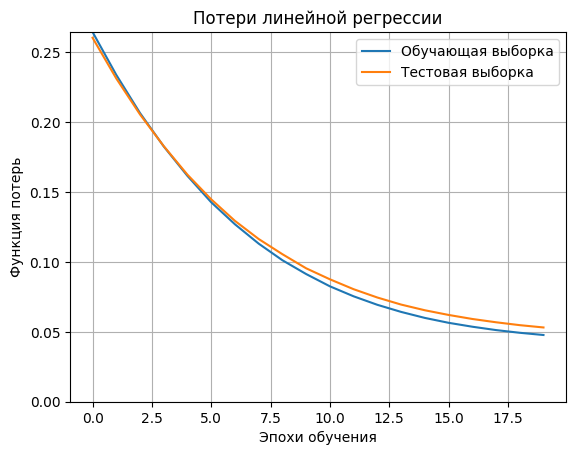

In [325]:
plot_loss(linear_history,"Потери линейной регрессии")

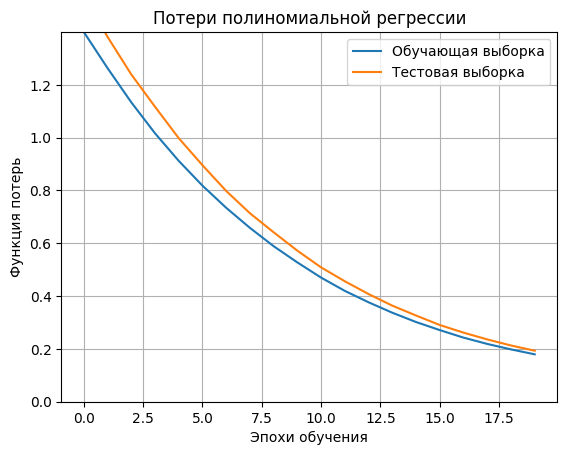

In [326]:
plot_loss(history,"Потери полиномиальной регрессии")

In [327]:
X_sorted = np.sort(Xz)


# 5.	Визуализируйте точки набора данных на плоскости в виде диаграммы рассеяния (ось X – независимый признак, ось Y – зависимый признак), а также линии линейной и полиномиальной регрессий (другими цветами), подписывая оси и рисунок и создавая легенду.

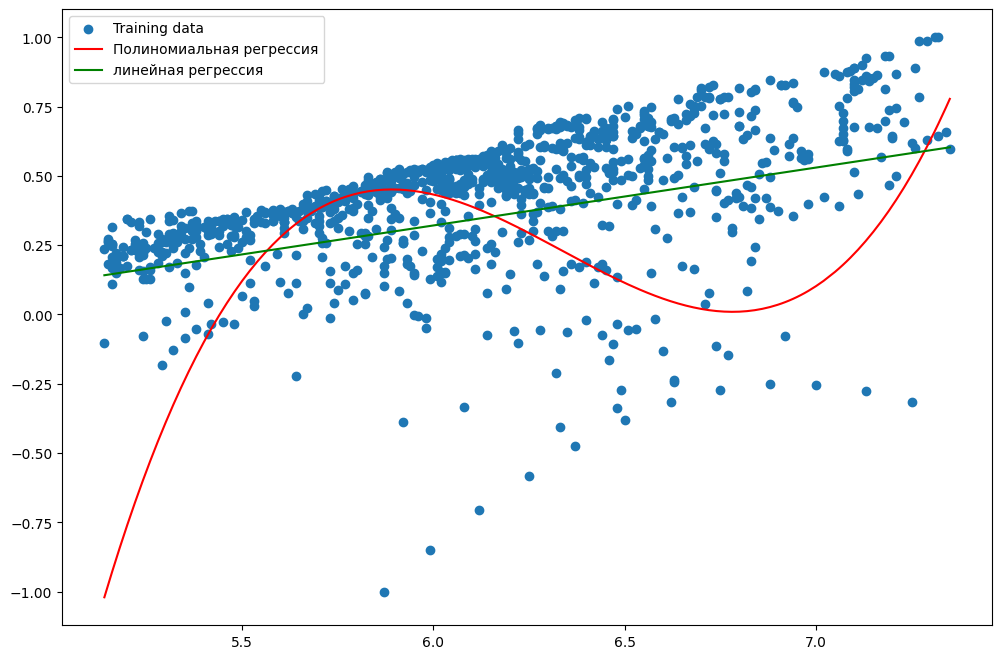

In [328]:
plt.figure(figsize=(12,8))
plt.scatter(Xz, ym,marker='o', label='Training data')
plt.plot(X_sorted, predict_yp, c='r', label='Полиномиальная регрессия')
plt.plot(np.sort(Xz), predict_y, c='g', label='линейная регрессия')
plt.legend();

# 6. Определите в исходном наборе данных признак (отличный от независимого и зависимого признаков), принимающий непрерывные значения и имеющий свойства, указанные в индивидуальном задании.

In [329]:
corr_m = df.corr()
min_id = corr_m['temp'].drop('temp').idxmin()
min = corr_m['temp'].drop('temp').min()
min_id, min

('doy', -0.32697571026473593)

# 7.Стандартизуйте этот признак и визуализируйте его в соответствии с индивидуальным заданием.  

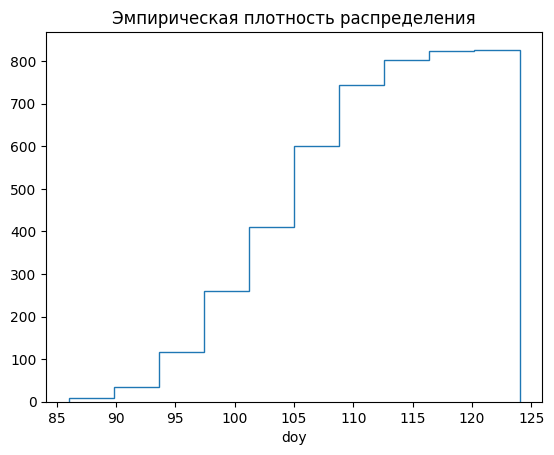

In [330]:
plt.hist(df['doy'], histtype='step', cumulative=True)
plt.xlabel('doy')
plt.title('Эмпирическая плотность распределения')
plt.show()

# 8.Сформируйте набор входных данных из двух стандартизованных признаков набора данных (независимый признак и определенный признак), постройте нейронную сеть (нелинейный регресор) с количеством скрытых слоев, количеством нейронов и функцией активации, указанными в индивидуальном задании, и одним нейроном в выходном слое и обучите ее на наборе данных из двух признаков и отклика. Отследите обучение нейронной сети, изменяя, при необходимости, гиперпараметры (функцию потерь, оптимизатор, шаг обучения и т.п.) или применяя регуляризацию.

In [331]:
from sklearn.preprocessing import Normalizer

df = df.dropna()
x = df[['temp', 'doy']].values
y = df['temp_lower'].values

feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(2,))
feature_normalizer.adapt(x)

In [332]:
large_model = tf.keras.Sequential([
    feature_normalizer,
    tf.keras.layers.Dense(units=128, activation='sigmoid'),
    tf.keras.layers.Dense(units=128, activation='sigmoid'),
    tf.keras.layers.Dense(units=128, activation='sigmoid'),
    tf.keras.layers.Dense(units=1)])
large_model.summary()

Model: "sequential_235"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_16 (Normaliz  (None, 2)                 3         
 ation)                                                          
                                                                 
 dense_489 (Dense)           (None, 128)               384       
                                                                 
 dense_490 (Dense)           (None, 128)               16512     
                                                                 
 dense_491 (Dense)           (None, 128)               16512     
                                                                 
 dense_492 (Dense)           (None, 1)                 129       
                                                                 
Total params: 33540 (131.02 KB)
Trainable params: 33537 (131.00 KB)
Non-trainable params: 3 (16.00 Byte)
_____________

In [333]:
large_model.compile(loss='mse')
history = large_model.fit(x, y, epochs=100,verbose=1,validation_split = 0.3)

Epoch 1/100
18/18 [==============================] - 1s 14ms/step - loss: 4.6508 - val_loss: 0.5665
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 0.5944 - val_loss: 0.5651
Epoch 3/100
18/18 [==============================] - 0s 8ms/step - loss: 0.5936 - val_loss: 0.5831
Epoch 4/100
18/18 [==============================] - 0s 15ms/step - loss: 0.6093 - val_loss: 0.5671
Epoch 5/100
18/18 [==============================] - 0s 11ms/step - loss: 0.6195 - val_loss: 1.1741
Epoch 6/100
18/18 [==============================] - 0s 13ms/step - loss: 0.6522 - val_loss: 0.6235
Epoch 7/100
18/18 [==============================] - 0s 12ms/step - loss: 0.6396 - val_loss: 0.5911
Epoch 8/100
18/18 [==============================] - 0s 16ms/step - loss: 0.5918 - val_loss: 0.6075
Epoch 9/100
18/18 [==============================] - 0s 20ms/step - loss: 0.6279 - val_loss: 0.6829
Epoch 10/100
18/18 [==============================] - 0s 16ms/step - loss: 0.6213 - val_loss: 0.5669
E

# 9. Визуализируйте набор данных в виде диаграммы рассеяния и прогноз нейронной сети в виде поверхности в трехмерном пространстве, подписывая оси и рисунок.

82/82 [==============================] - 0s 2ms/step


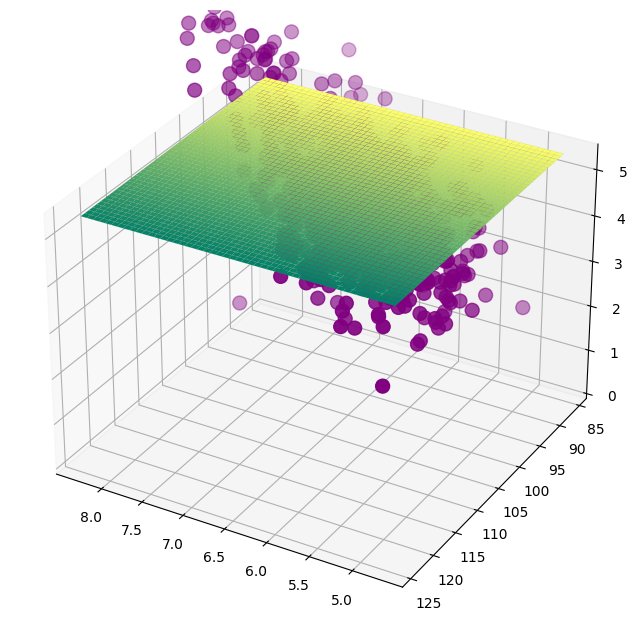

In [334]:
from matplotlib import cm


# разобьем данные на 3 координаты
xs = x[:,0]
ys = x[:,1]
zs = y
# шаг
n_plot = 51

# отсортируем списки с шагом n_plot
x_plot = np.linspace(np.min(xs), np.max(xs), n_plot)
y_plot = np.linspace(np.min(ys), np.max(ys), n_plot)
# создадим массивы координат
x_mesh, y_mesh = np.meshgrid(x_plot, y_plot)
# преобразуем в одномерный массив размера 51*51
x_plot2 = np.reshape(x_mesh, [n_plot**2,1])
y_plot2 = np.reshape(y_mesh, [n_plot**2,1])
# cтек массивов последовательно по горизонтали
xy_2 = np.hstack([x_plot2, y_plot2])
# спрогнозируем z
z = large_model.predict(xy_2)
# преобразуем в массив 51*51
z_mesh = z.reshape((n_plot, n_plot))

# отрисуем график
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x_mesh, y_mesh, z_mesh,rstride=1, cstride=1, linewidth=0.05, cmap=cm.summer, antialiased=True,edgecolors='gray')
ax.scatter( xs, ys, zs, s=100, c='purple' )
ax.set_zlabel('Z', fontsize=14)
ax.set_zlim(0., z_mesh.max())
ax.view_init(elev = 30, azim = 120)

# 10. Разбейте набор данных из двух признаков и отклика на обучающую и тестовую выборки и постройте кривые обучения для заданного показателя качества в зависимости от количества точек в обучающей выборке, подписывая оси и рисунок и создавая легенду.

In [335]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((629, 2), (158, 2), (629,), (158,))

In [336]:
train_score = []
test_score = []

for i in range(13, 629, 10):
    large_model = tf.keras.Sequential([
        feature_normalizer,
        tf.keras.layers.Dense(units=128, activation='sigmoid'),
        tf.keras.layers.Dense(units=1)
    ])
    large_model.compile(loss='mse')
    large_model.fit(x_train[:i], y_train[:i], epochs=10, verbose=0)
    y_train_predict = large_model.predict(x_train[:i])
    train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    y_test_predict = large_model.predict(x_test)
    test_score.append(mean_squared_error(y_test, y_test_predict))

5/5 [==============================] - 0s 3ms/step


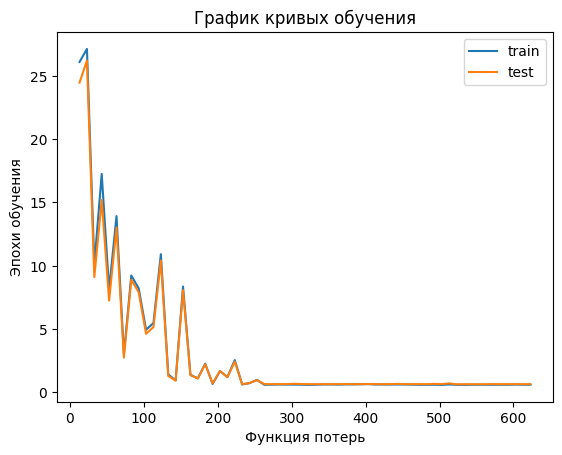

In [337]:
plt.plot([i for i in range(13, len(x_train), 10)],train_score, label="train")
plt.plot([i for i in range(13, len(x_train), 10)],test_score, label="test")
plt.title('График кривых обучения')
plt.xlabel('Функция потерь')
plt.ylabel('Эпохи обучения')
plt.legend();